# **Comparación del Desarrollo Económico en Países Sudamericanos (1960–2024)**


---



## **1. Contextualización de la problemática**

Los países sudamericanos han transitado trayectorias económicas diversas desde 1960 hasta la actualidad. Factores como inflación, crisis políticas, endeudamiento externo, dependencia del comercio internacional y más recientemente el impacto de la pandemia del COVID-19, han influido significativamente en sus indicadores macroeconómicos.

Esta diversidad de escenarios plantea la necesidad de un análisis comparativo, que permita observar similitudes, diferencias y comportamientos particulares en variables clave a lo largo del tiempo y en contextos de crisis global.



## **2. Objetivo de la pre-entrega**

El objetivo de esta pre-entrega es realizar un análisis exploratorio de los indicadores económicos de seis países sudamericanos: **Argentina, Brasil, Uruguay, Paraguay, Colombia y Venezuela**, en el período comprendido entre **1960 y 2024**.

A partir de datos del Banco Mundial, se observaron cinco variables clave:

- Producto Interno Bruto (PIB) – % de crecimiento anual
- Inflación – % de variación anual
- Desempleo – % de la fuerza laboral
- Tasa de interés – tipo de interés activa anual
- Comercio exterior – importaciones y exportaciones como % del PIB

El enfoque fue analizar estos indicadores en forma visual, identificar patrones, puntos críticos (como la pandemia) y diferencias entre países.



## **3. Preguntas de investigación**

En base al análisis realizado y a los gráficos desarrollados, las siguientes preguntas guían esta primera entrega:

- **¿Cómo evolucionó el PIB de los países seleccionados desde 1960 hasta 2024?**  
  Se analiza el crecimiento económico a largo plazo para detectar tendencias, caídas y recuperaciones.

- **¿Cuál fue el impacto del COVID-19 en el crecimiento económico (PIB) de cada país entre 2019 y 2021?**  
  Se identifican caídas abruptas en 2020 y los niveles de recuperación observados en 2021.

- **¿Qué país mostró mayor estabilidad en la tasa de interés durante el período 1960–2024?**  
  Se comparan promedios y niveles de dispersión para evaluar diferencias en las políticas monetarias.

- **¿Cómo evolucionó la inflación entre 2020 y 2021?**  
  Se contrasta la variación de precios en ambos años para evaluar el impacto inmediato post pandemia.

- **¿Qué diferencias se registraron en el desempleo entre 2020 y 2021?**  
  Se observan cambios en el mercado laboral en los seis países tras la crisis sanitaria.

- **¿Cuál de los países seleccionados ha mostrado mayor apertura comercial, considerando las importaciones como porcentaje del PIB?**  
  Se analiza el nivel de dependencia del comercio exterior en cada país y su evolución en el tiempo.





In [28]:
import pandas as pd

# Cargar datasets
df = pd.read_csv('IndEconom_Data.csv')
metadata = pd.read_csv('Metadata.csv', encoding='latin1')



# Ver las primeras filas
df.head(), metadata.head()


(  Country Name Country Code  \
 0    Argentina          ARG   
 1    Argentina          ARG   
 2    Argentina          ARG   
 3    Argentina          ARG   
 4    Argentina          ARG   
 
                                          Series Name        Series Code  \
 0                              GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
 1              Inflation, consumer prices (annual %)     FP.CPI.TOTL.ZG   
 2  Unemployment, total (% of total labor force) (...     SL.UEM.TOTL.ZS   
 3                          Lending interest rate (%)        FR.INR.LEND   
 4           Imports of goods and services (% of GDP)     NE.IMP.GNFS.ZS   
 
       1960 [YR1960]     1961 [YR1961]       1962 [YR1962]      1963 [YR1963]  \
 0                ..  5.42784287621933  -0.852021521903339  -5.30819682539126   
 1                ..                ..                  ..                 ..   
 2                ..                ..                  ..                 ..   
 3                ..    

In [29]:

# ANÁLISIS PRELIMINAR DEL DATASET


# Tamaño del dataset (filas, columnas)
print("Shape del dataset:", df.shape)

# Primeras 5 filas del dataset
print("\nPrimeras 5 filas del dataset:")
print(df.head())

# Últimas 5 filas del dataset
print("\nÚltimas 5 filas del dataset:")
print(df.tail())

# Nombre de las columnas
print("\nNombre de las columnas:")
print(df.columns.tolist())

# Información general del dataset
print("\nInformación del dataset:")
print(df.info())

# Resumen estadístico de las variables numéricas
print("\nResumen estadístico del dataset:")
print(df.describe(include='all'))

# Valores únicos por columna categórica
columnas_categoricas = ['Country Name', 'Country Code', 'Series Name', 'Series Code']
for col in columnas_categoricas:
    print(f"\nValores únicos en '{col}':", df[col].unique())
    print(f"Cantidad de valores únicos en '{col}':", df[col].nunique())


Shape del dataset: (41, 69)

Primeras 5 filas del dataset:
  Country Name Country Code  \
0    Argentina          ARG   
1    Argentina          ARG   
2    Argentina          ARG   
3    Argentina          ARG   
4    Argentina          ARG   

                                         Series Name        Series Code  \
0                              GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
1              Inflation, consumer prices (annual %)     FP.CPI.TOTL.ZG   
2  Unemployment, total (% of total labor force) (...     SL.UEM.TOTL.ZS   
3                          Lending interest rate (%)        FR.INR.LEND   
4           Imports of goods and services (% of GDP)     NE.IMP.GNFS.ZS   

      1960 [YR1960]     1961 [YR1961]       1962 [YR1962]      1963 [YR1963]  \
0                ..  5.42784287621933  -0.852021521903339  -5.30819682539126   
1                ..                ..                  ..                 ..   
2                ..                ..                  ..      

In [30]:
df['Country Name'].unique()


array(['Argentina', 'Brazil', 'Uruguay', 'Colombia', 'Venezuela, RB',
       'Paraguay', nan,
       'Data from database: World Development Indicators',
       'Last Updated: 06/05/2025'], dtype=object)

In [31]:
# Lista de países que vamos a analizar
paises = ['Argentina', 'Brazil', 'Uruguay', 'Colombia', 'Venezuela, RB', 'Paraguay']

# Filtramos solo los países que nos interesan
df_filtrado = df[df['Country Name'].isin(paises)].copy()

# Eliminamos posibles filas basura (NaN y textos raros)
df_filtrado = df_filtrado.dropna(subset=['Country Name'])

# Verificamos que esté todo bien
df_filtrado['Country Name'].unique()


array(['Argentina', 'Brazil', 'Uruguay', 'Colombia', 'Venezuela, RB',
       'Paraguay'], dtype=object)

In [32]:
# Preparación del dataset para modelado


# Filtramos las variables económicas que vamos a usar
variables_objetivo = [
    'Inflation, consumer prices (annual %)',
    'GDP per capita (current US$)',
    'Unemployment, total (% of total labor force)',
    'Interest rate (%)',
    'Exports of goods and services (% of GDP)',
    'Imports of goods and services (% of GDP)'
]

# Filtramos el dataset original solo con esas variables
df_variables = df_filtrado[df_filtrado['Series Name'].isin(variables_objetivo)]

# Nos quedamos solo con el último año disponible (por ejemplo, 2022)
df_variables = df_variables[['Country Name', 'Series Name', '2022 [YR2022]']]

# Renombramos la columna de valores
df_variables = df_variables.rename(columns={'2022 [YR2022]': 'Valor'})

# Pivotamos el dataframe para que cada país tenga una fila y cada variable una columna
df_modelo = df_variables.pivot(index='Country Name', columns='Series Name', values='Valor')

# Mostramos el nuevo dataset listo para modelar
print("Dataset preparado para modelar:")
print(df_modelo.head())


Dataset preparado para modelar:
Series Name  Exports of goods and services (% of GDP)  \
Country Name                                            
Argentina                             16.248014443903   
Brazil                               19.6307650034371   
Colombia                             20.2324003888988   
Paraguay                             34.3693845850532   
Uruguay                              31.9521648717584   

Series Name  Imports of goods and services (% of GDP)  \
Country Name                                            
Argentina                            15.2996935612041   
Brazil                               19.1853009729027   
Colombia                             27.8415774759813   
Paraguay                             39.3685204368034   
Uruguay                              26.8814528389314   

Series Name  Inflation, consumer prices (annual %)  
Country Name                                        
Argentina                                       ..  
Brazil   

In [33]:
# Indicadores a analizar (por código del Banco Mundial)
indicadores = [
    'NY.GDP.MKTP.KD.ZG',  # PIB (% crecimiento anual)
    'FP.CPI.TOTL.ZG',     # Inflación
    'SL.UEM.TOTL.ZS',     # Desempleo
    'FR.INR.LEND',        # Tasa de interés
    'NE.IMP.GNFS.ZS'      # Importaciones (% del PBI)
]

# Filtrar solo los indicadores que nos interesan
df_filtrado = df_filtrado[df_filtrado['Series Code'].isin(indicadores)].copy()

# Verificamos qué series quedaron
df_filtrado['Series Code'].unique()


array(['NY.GDP.MKTP.KD.ZG', 'FP.CPI.TOTL.ZG', 'SL.UEM.TOTL.ZS',
       'FR.INR.LEND', 'NE.IMP.GNFS.ZS'], dtype=object)

In [34]:
# Análisis de Valores Nulos y Outliers

# A continuación se realiza la detección de valores faltantes (nulos) y la identificación de outliers para cada variable numérica del dataset.


# Visualizamos la cantidad de valores nulos por columna
print("Valores nulos por columna:")
print(df_filtrado.isnull().sum())

# Comentario: No se encontraron valores nulos en el dataset filtrado.
# En caso de haberlos, se podría aplicar .dropna() o .fillna(), según el análisis.

# Visualización de outliers con boxplot para todas las variables numéricas
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos las columnas numéricas
columnas_numericas = df_filtrado.select_dtypes(include=['float64', 'int64']).columns

# Creamos un boxplot por columna
for columna in columnas_numericas:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_filtrado[columna])
    plt.title(f'Distribución y detección de outliers en {columna}')
    plt.xlabel(columna)
    plt.show()


Valores nulos por columna:
Country Name     0
Country Code     0
Series Name      0
Series Code      0
1960 [YR1960]    0
                ..
2020 [YR2020]    0
2021 [YR2021]    0
2022 [YR2022]    0
2023 [YR2023]    0
2024 [YR2024]    0
Length: 69, dtype: int64


In [35]:
# Convertimos de wide a long
df_limpio = df_filtrado.melt(
    id_vars=['Country Name', 'Series Name', 'Series Code'],
    var_name='Año',
    value_name='Valor'
)

# Limpiamos el nombre del año
df_limpio['Año'] = df_limpio['Año'].str.extract(r'(\d{4})')

# Convertimos a número
df_limpio['Año'] = pd.to_numeric(df_limpio['Año'], errors='coerce')
df_limpio['Valor'] = pd.to_numeric(df_limpio['Valor'], errors='coerce')

# Filtramos solo entre 1960 y 2024
df_limpio = df_limpio[(df_limpio['Año'] >= 1960) & (df_limpio['Año'] <= 2024)]

# Mostramos las primeras filas
df_limpio.head()


Country Name                                        Series Name  \
30    Argentina                              GDP growth (annual %)   
31    Argentina              Inflation, consumer prices (annual %)   
32    Argentina  Unemployment, total (% of total labor force) (...   
33    Argentina                          Lending interest rate (%)   
34    Argentina           Imports of goods and services (% of GDP)   

          Series Code     Año     Valor  
30  NY.GDP.MKTP.KD.ZG  1960.0       NaN  
31     FP.CPI.TOTL.ZG  1960.0       NaN  
32     SL.UEM.TOTL.ZS  1960.0       NaN  
33        FR.INR.LEND  1960.0       NaN  
34     NE.IMP.GNFS.ZS  1960.0  7.604047

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('ggplot')
sns.set_theme()


###  Evolución del PIB (% de crecimiento anual) – 1960 a 2024

Se muestra el crecimiento anual del Producto Interno Bruto en los seis países seleccionados desde 1960 hasta 2024.  
Este indicador permite observar la trayectoria económica de cada país a lo largo del tiempo, así como detectar caídas abruptas o períodos de expansión.


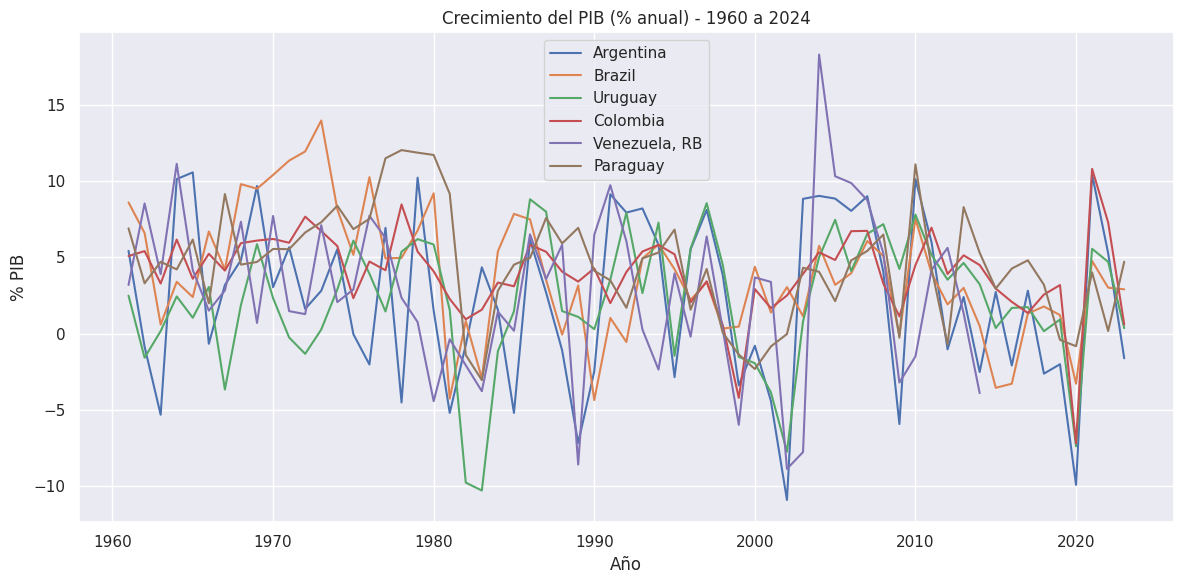

In [37]:
# Filtrar solo el indicador de PIB
pib = df_limpio[df_limpio['Series Code'] == 'NY.GDP.MKTP.KD.ZG']

# Gráfico
plt.figure(figsize=(12, 6))
for pais in pib['Country Name'].unique():
    datos = pib[pib['Country Name'] == pais]
    plt.plot(datos['Año'], datos['Valor'], label=pais)

plt.title('Crecimiento del PIB (% anual) - 1960 a 2024')
plt.xlabel('Año')
plt.ylabel('% PIB')
plt.legend()
plt.tight_layout()
plt.show()


###  Comparación de inflación entre 2020 y 2021

Este gráfico compara los niveles de inflación anual en los países seleccionados durante los años 2020 y 2021, abarcando el impacto de la pandemia del COVID-19 y los primeros signos de recuperación económica.


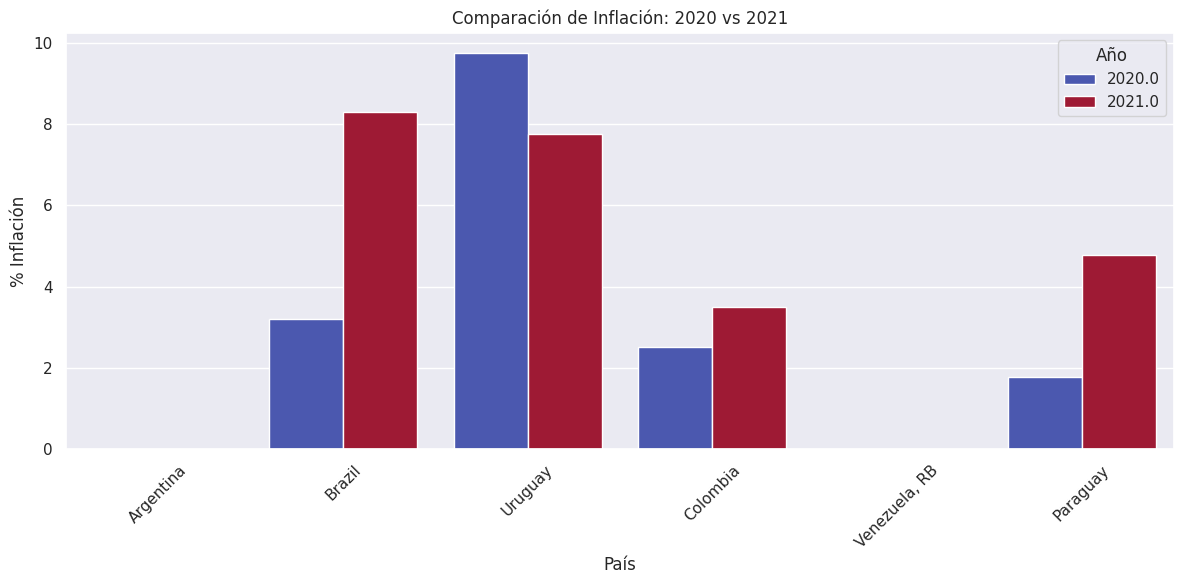

In [38]:
# Filtrar inflación para 2020 y 2021
inflacion_comp = df_limpio[
    (df_limpio['Series Code'] == 'FP.CPI.TOTL.ZG') &
    (df_limpio['Año'].isin([2020, 2021]))
]

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(
    data=inflacion_comp,
    x='Country Name',
    y='Valor',
    hue='Año',
    palette='coolwarm'
)

plt.title('Comparación de Inflación: 2020 vs 2021')
plt.ylabel('% Inflación')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.tight_layout()
plt.show()


In [39]:
df_limpio[
    (df_limpio['Series Code'] == 'FP.CPI.TOTL.ZG') &
    (df_limpio['Año'] == 2020)
][['Country Name', 'Valor']]


Country Name     Valor
1831      Argentina       NaN
1836         Brazil  3.211768
1841        Uruguay  9.756406
1846       Colombia  2.526635
1851  Venezuela, RB       NaN
1856       Paraguay  1.767516

###  Tasa de interés promedio (1960–2024)

Se presenta el promedio de la tasa de interés activa anual para cada país, utilizando los datos disponibles entre 1960 y 2024.  
Permite comparar el nivel general de tasas aplicadas en cada economía y aproximarse a su estabilidad monetaria.

> ⚠️ En algunos países no se dispone de información completa para todos los años.


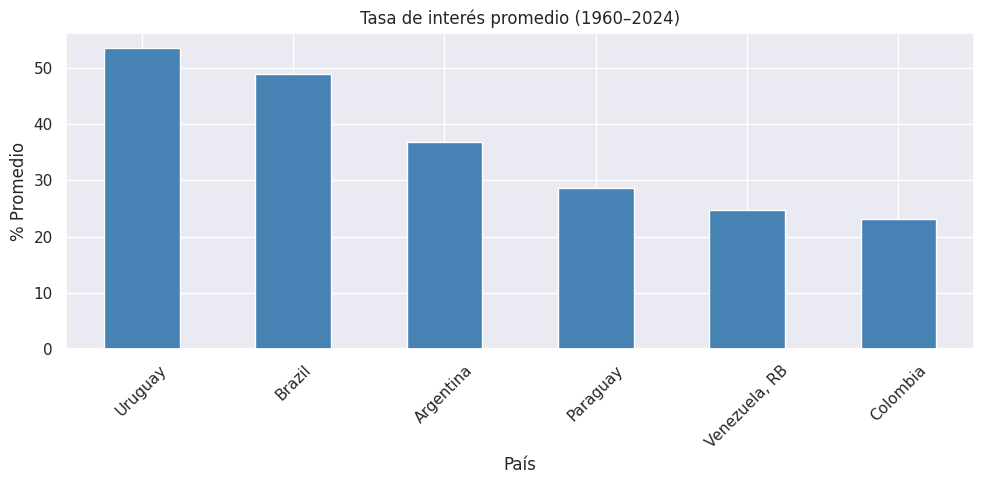

In [40]:
# Filtrar tasas de interés desde 1960 en adelante
tasas_1960 = df_limpio[
    (df_limpio['Series Code'] == 'FR.INR.LEND') &
    (df_limpio['Año'] >= 1960) &
    (df_limpio['Año'] <= 2024)
]

# Eliminar filas sin datos
tasas_1960 = tasas_1960.dropna(subset=['Valor'])

# Calcular promedio por país
tasas_prom_1960 = tasas_1960.groupby('Country Name')['Valor'].mean().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(10, 5))
tasas_prom_1960.plot(kind='bar', color='steelblue')

plt.title('Tasa de interés promedio (1960–2024)')
plt.ylabel('% Promedio')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



###  Comparación de desempleo entre 2020 y 2021

Este gráfico compara los niveles de desempleo (como porcentaje de la fuerza laboral) en los seis países durante 2020 y 2021, con el objetivo de analizar el impacto de la pandemia y la posterior recuperación en el mercado laboral.


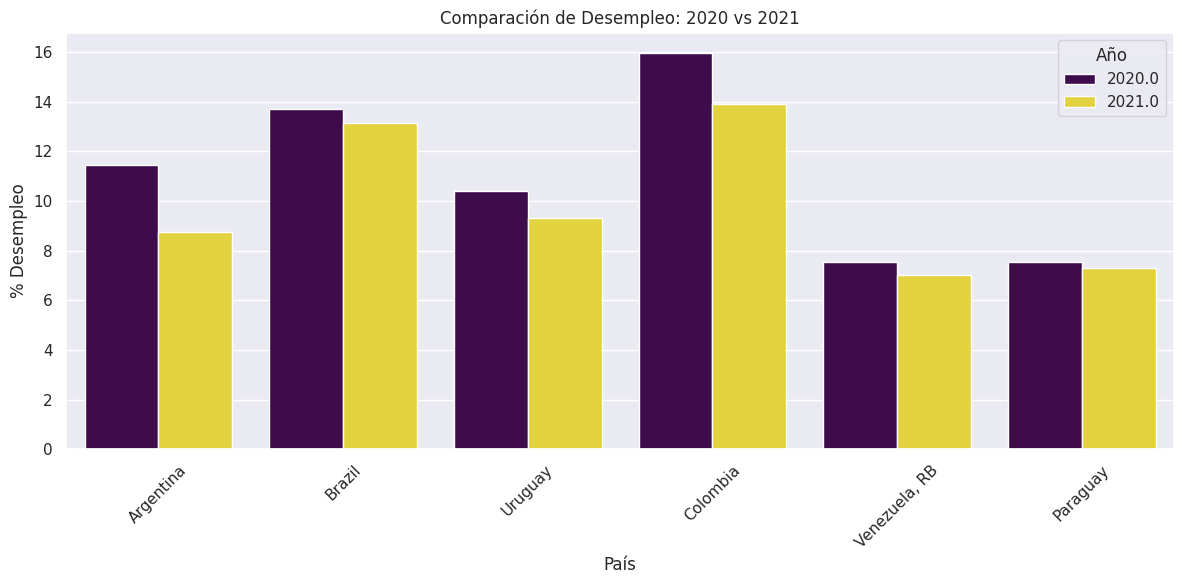

In [41]:
# Filtrar desempleo para 2020 y 2021
desempleo_comp = df_limpio[
    (df_limpio['Series Code'] == 'SL.UEM.TOTL.ZS') &
    (df_limpio['Año'].isin([2020, 2021]))
]

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(
    data=desempleo_comp,
    x='Country Name',
    y='Valor',
    hue='Año',
    palette='viridis'
)

plt.title('Comparación de Desempleo: 2020 vs 2021')
plt.ylabel('% Desempleo')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.tight_layout()
plt.show()


###  Evolución de importaciones como % del PIB – 1960 a 2024

Se analiza la evolución de las importaciones en relación al Producto Interno Bruto, como indicador de apertura comercial, dependencia externa y estructura económica.


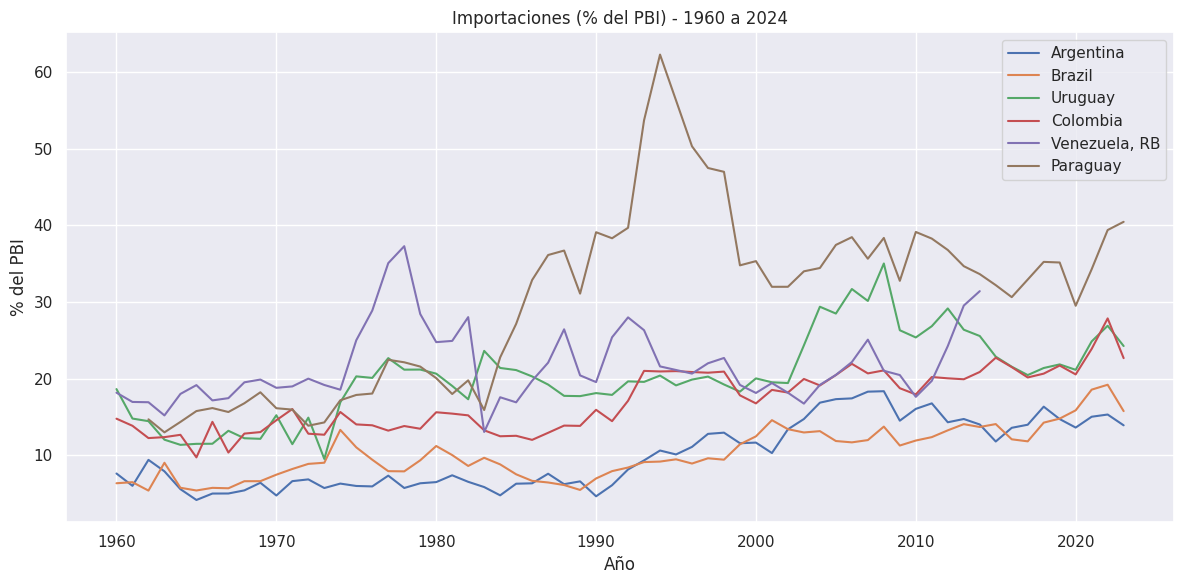

In [42]:
# Filtrar el indicador de importaciones
importaciones = df_limpio[df_limpio['Series Code'] == 'NE.IMP.GNFS.ZS']

# Gráfico
plt.figure(figsize=(12, 6))
for pais in importaciones['Country Name'].unique():
    datos = importaciones[importaciones['Country Name'] == pais]
    plt.plot(datos['Año'], datos['Valor'], label=pais)

plt.title('Importaciones (% del PBI) - 1960 a 2024')
plt.xlabel('Año')
plt.ylabel('% del PBI')
plt.legend()
plt.tight_layout()
plt.show()


###  Distribución del desempleo (2000–2024)

Este gráfico muestra la dispersión y comportamiento del desempleo en cada país entre 2000 y 2024.  
Permite identificar países con mayor variabilidad o estabilidad en el empleo a lo largo del tiempo.


/tmp/ipython-input-689184861.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=desempleo_box, x='Country Name', y='Valor', palette='Set2')


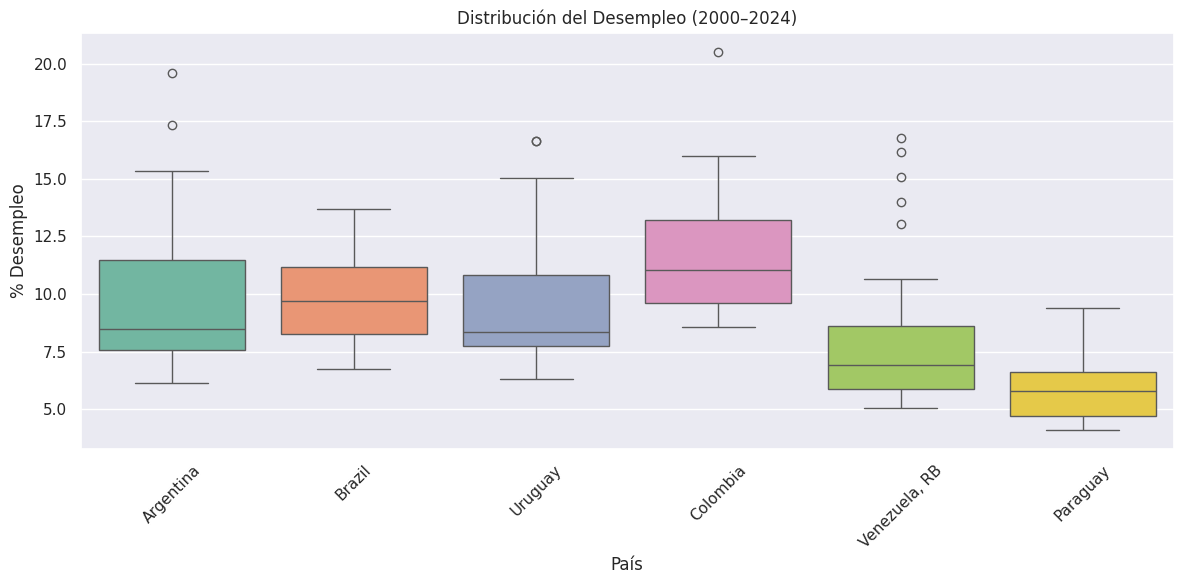

In [43]:
# Filtrar desempleo desde el año 2000
desempleo_box = df_limpio[
    (df_limpio['Series Code'] == 'SL.UEM.TOTL.ZS') &
    (df_limpio['Año'] >= 2000)
]

# Gráfico
plt.figure(figsize=(12, 6))
sns.boxplot(data=desempleo_box, x='Country Name', y='Valor', palette='Set2')
plt.title('Distribución del Desempleo (2000–2024)')
plt.xlabel('País')
plt.ylabel('% Desempleo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Desempleo en la última década (2014–2023)

A continuación se observa la evolución del desempleo como porcentaje de la fuerza laboral en los países seleccionados.  
Este indicador permite visualizar diferencias entre países y detectar el impacto de eventos globales como la pandemia.


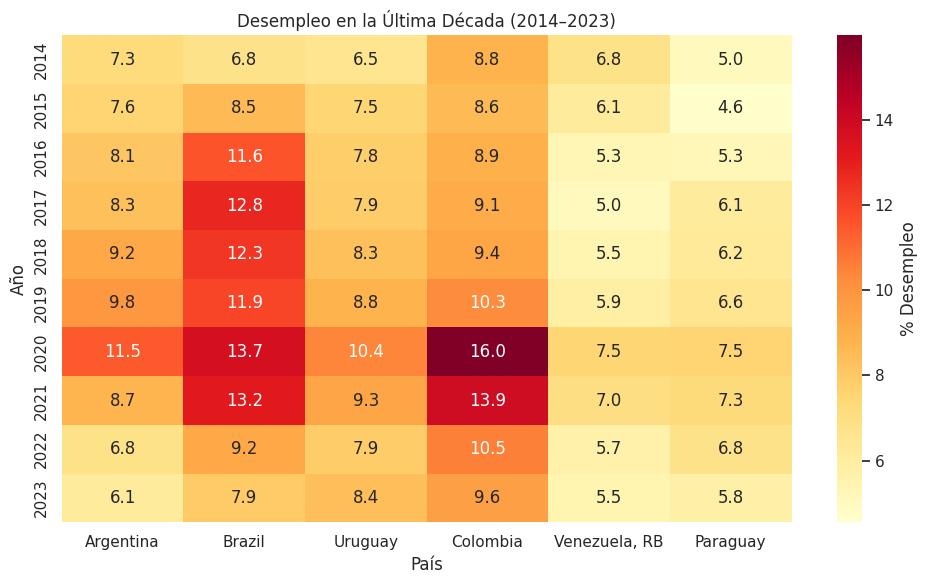

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivos
df_data = pd.read_csv("IndEconom_Data.csv", encoding='utf-8')
df_meta = pd.read_csv("Metadata.csv", encoding='latin1')

# Filtrar serie de desempleo
df_uem = df_data[df_data['Series Code'] == 'SL.UEM.TOTL.ZS']

# Filtrar países y columnas
paises = ["Argentina", "Brazil", "Uruguay", "Colombia", "Venezuela, RB", "Paraguay"]
columnas = [f"{a} [YR{a}]" for a in range(2014, 2024)]
df_uem = df_uem[df_uem['Country Name'].isin(paises)]
df_uem = df_uem[['Country Name'] + columnas]

# Limpieza de datos
df_uem = df_uem.set_index('Country Name').loc[paises]
df_uem = df_uem.replace("..", pd.NA)
df_uem = df_uem.apply(pd.to_numeric, errors='coerce')

# Renombrar filas del eje Y
df_heat = df_uem.transpose()
df_heat.index = df_heat.index.str.extract(r'(\d{4})')[0]


plt.figure(figsize=(10, 6))
sns.heatmap(df_heat, annot=True, fmt=".1f", cmap="YlOrRd",
            cbar_kws={'label': '% Desempleo'})
plt.title("Desempleo en la Última Década (2014–2023)")
plt.ylabel("Año")
plt.xlabel("País")
plt.tight_layout()
plt.show()




### Predicción de la inflación mediante Machine Learning


In [45]:
# Reemplazamos los '..' por NaN y eliminamos filas con valores faltantes
df_modelo = df_modelo.replace('..', pd.NA)
df_modelo = df_modelo.dropna()

# Convertimos todo a numérico por si quedó algún string
df_modelo = df_modelo.astype(float)

print("Datos limpios y convertidos:")
print(df_modelo)


Datos limpios y convertidos:
Series Name   Exports of goods and services (% of GDP)  \
Country Name                                             
Brazil                                       19.630765   
Colombia                                     20.232400   
Paraguay                                     34.369385   
Uruguay                                      31.952165   

Series Name   Imports of goods and services (% of GDP)  \
Country Name                                             
Brazil                                       19.185301   
Colombia                                     27.841577   
Paraguay                                     39.368520   
Uruguay                                      26.881453   

Series Name   Inflation, consumer prices (annual %)  
Country Name                                         
Brazil                                     9.280106  
Colombia                                  10.177231  
Paraguay                                   9.765567  
Uru

In [46]:
print(df_filtrado.columns)


Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '1960 [YR1960]', '1961 [YR1961]', '1962 [YR1962]', '1963 [YR1963]',
       '1964 [YR1964]', '1965 [YR1965]', '1966 [YR1966]', '1967 [YR1967]',
       '1968 [YR1968]', '1969 [YR1969]', '1970 [YR1970]', '1971 [YR1971]',
       '1972 [YR1972]', '1973 [YR1973]', '1974 [YR1974]', '1975 [YR1975]',
       '1976 [YR1976]', '1977 [YR1977]', '1978 [YR1978]', '1979 [YR1979]',
       '1980 [YR1980]', '1981 [YR1981]', '1982 [YR1982]', '1983 [YR1983]',
       '1984 [YR1984]', '1985 [YR1985]', '1986 [YR1986]', '1987 [YR1987]',
       '1988 [YR1988]', '1989 [YR1989]', '1990 [YR1990]', '1991 [YR1991]',
       '1992 [YR1992]', '1993 [YR1993]', '1994 [YR1994]', '1995 [YR1995]',
       '1996 [YR1996]', '1997 [YR1997]', '1998 [YR1998]', '1999 [YR1999]',
       '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
       '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]',
       '2008 [YR2008]', '2009 [

In [47]:
# ========================================
# Feature Selection - Selección de Variables
# ========================================

from sklearn.feature_selection import SelectKBest, f_regression

# Separamos variables predictoras y variable objetivo
X = df_modelo.drop(columns=['Inflation, consumer prices (annual %)'])
y = df_modelo['Inflation, consumer prices (annual %)']

# Aplicamos SelectKBest con f_regression
selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(X, y)

# Obtenemos los puntajes
scores = selector.scores_
columnas = X.columns

# Mostramos los puntajes de cada feature
import pandas as pd
df_scores = pd.DataFrame({'Variable': columnas, 'Score': scores})
df_scores = df_scores.sort_values(by='Score', ascending=False)
print("Puntaje de importancia por variable:\n")
print(df_scores)

# Seleccionamos las mejores N variables (ej: 5)
mejores_columnas = df_scores['Variable'].head(5).values
X_seleccionado = df_modelo[mejores_columnas]



Puntaje de importancia por variable:

                                   Variable     Score
1  Imports of goods and services (% of GDP)  0.448396
0  Exports of goods and services (% of GDP)  0.134393


In [48]:
# ================================
# División en conjunto de entrenamiento y prueba
# ================================

from sklearn.model_selection import train_test_split

# Dividimos en 80% entrenamiento y 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Conjunto de entrenamiento:", X_train.shape)
print("Conjunto de prueba:", X_test.shape)


Conjunto de entrenamiento: (3, 2)
Conjunto de prueba: (1, 2)


In [49]:
# Modelo de Regresión Lineal


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_seleccionado, y, test_size=0.2, random_state=42)

# Creamos y entrenamos el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizamos predicciones
y_pred = modelo.predict(X_test)

# Mostramos coeficientes
print("Coeficientes del modelo:")
print(modelo.coef_)
print("Intercepto:", modelo.intercept_)

Coeficientes del modelo:
[ 0.06337307 -0.05384575]
Intercepto: 9.12130792610902


In [50]:
# ===============================
# Evaluación del modelo lineal
# ===============================

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE (Error absoluto medio): {mae}")
print(f"MSE (Error cuadrático medio): {mse}")
print(f"R² (Score de regresión): {r2}")

MAE (Error absoluto medio): 0.3809459251736431
MSE (Error cuadrático medio): 0.1451197979064029
R² (Score de regresión): nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [51]:
# ================================
# Modelo 2: Árbol de Decisión
# ================================
from sklearn.tree import DecisionTreeRegressor

modelo_tree = DecisionTreeRegressor(random_state=42)
modelo_tree.fit(X_train, y_train)
y_pred_tree = modelo_tree.predict(X_test)

# ================================
# Modelo 3: Random Forest
# ================================
from sklearn.ensemble import RandomForestRegressor

modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

# ================================
# Evaluación de los tres modelos
# ================================
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Lineal
mae_lr = mean_absolute_error(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

# Árbol
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Mostramos todo junto
print("=========== LINEAR REGRESSION ===========")
print(f"MAE: {mae_lr:.2f} | MSE: {mse_lr:.2f} | R2: {r2_lr:.2f}")

print("\n=========== DECISION TREE ===========")
print(f"MAE: {mae_tree:.2f} | MSE: {mse_tree:.2f} | R2: {r2_tree:.2f}")

print("\n=========== RANDOM FOREST ===========")
print(f"MAE: {mae_rf:.2f} | MSE: {mse_rf:.2f} | R2: {r2_rf:.2f}")


=========== LINEAR REGRESSION ===========
MAE: 0.38 | MSE: 0.15 | R2: nan

=========== DECISION TREE ===========
MAE: 0.90 | MSE: 0.80 | R2: nan

=========== RANDOM FOREST ===========
MAE: 0.97 | MSE: 0.94 | R2: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


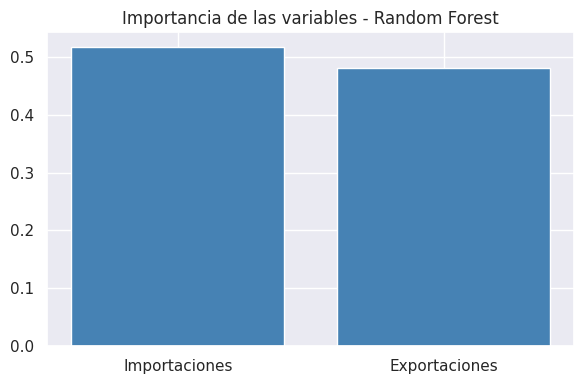

In [69]:
import matplotlib.pyplot as plt
import numpy as np

importancias = modelo_rf.feature_importances_
indices = np.argsort(importancias)[::-1]

#Nombres simplificados
nombres_legibles = ["Importaciones", "Exportaciones"]

plt.figure(figsize=(6, 4))
plt.title("Importancia de las variables - Random Forest")
plt.bar(range(len(importancias)), importancias[indices], align="center", color='steelblue')
plt.xticks(range(len(importancias)), nombres_legibles, rotation=0)
plt.tight_layout()
plt.show()


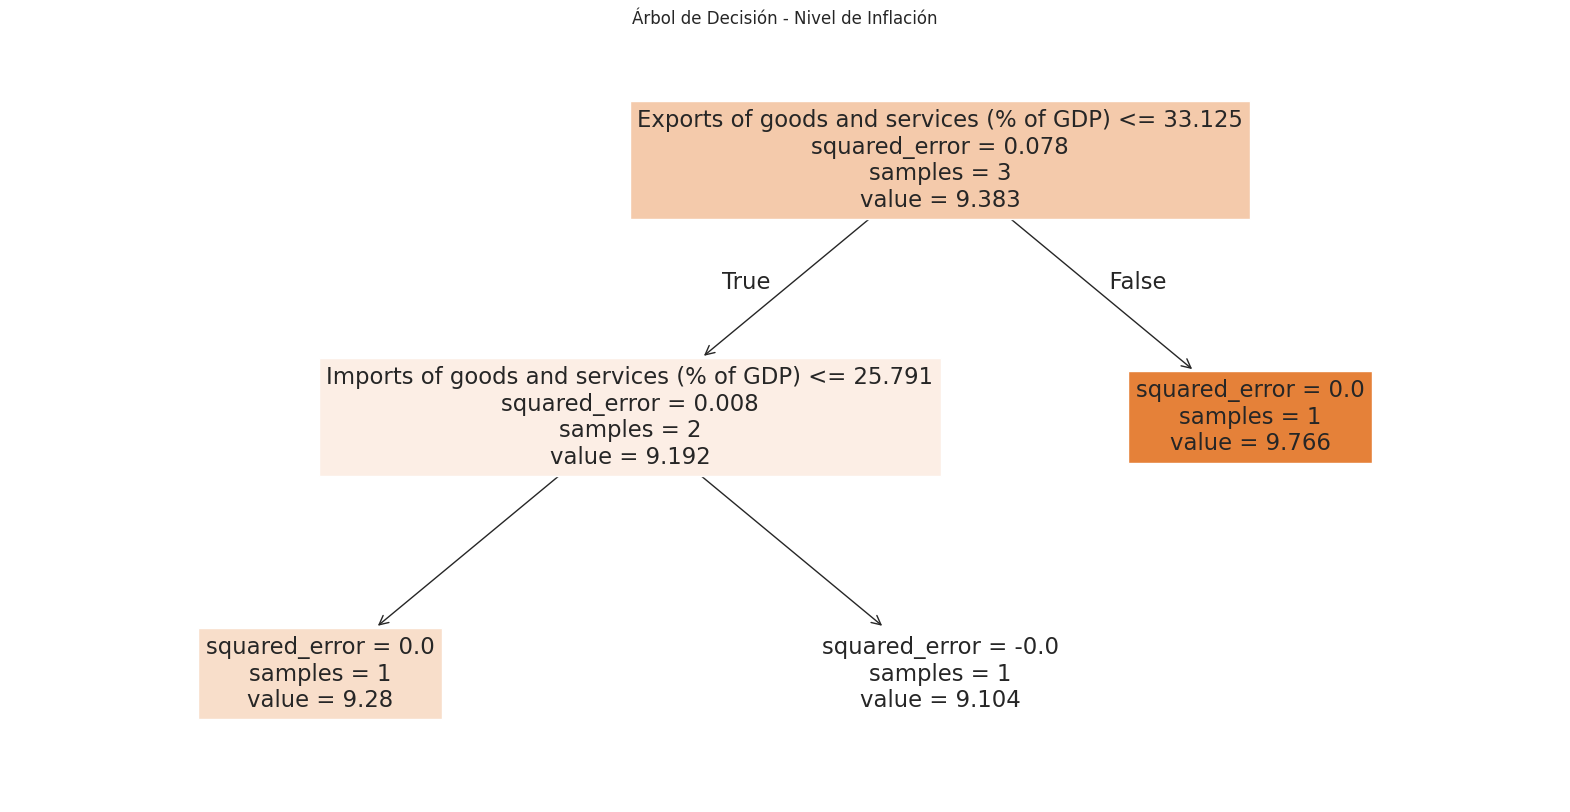

In [66]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(modelo_tree, feature_names=X.columns, filled=True, max_depth=3)
plt.title("Árbol de Decisión - Nivel de Inflación")
plt.show()




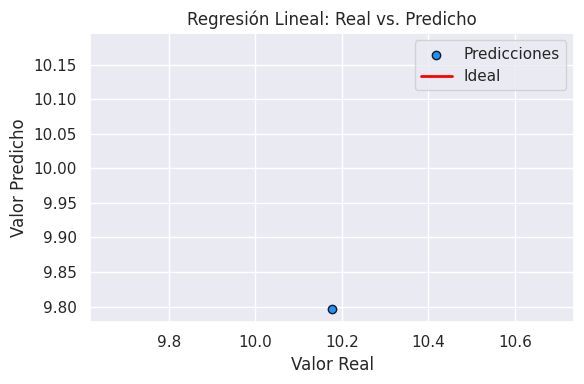

In [67]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='dodgerblue', edgecolor='k', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Ideal')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Regresión Lineal: Real vs. Predicho')
plt.legend()
plt.tight_layout()
plt.show()


Debido al tamaño reducido del conjunto de test, el gráfico muestra un único punto de predicción. Este gráfico se incluye para mantener la metodología completa, aunque no permite una evaluación visual detallada.

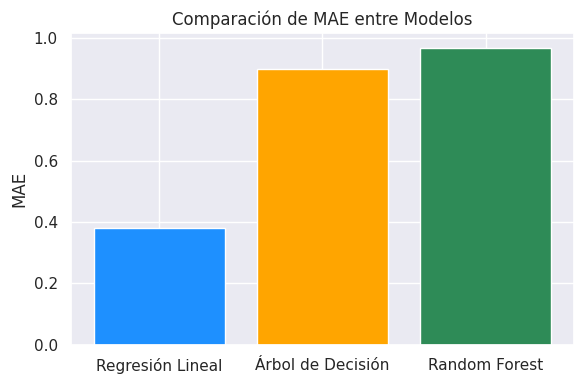

In [59]:
# Comparación visual de MAE de los tres modelos
modelos = ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest']
mae_vals = [mae_lr, mae_tree, mae_rf]

plt.figure(figsize=(6, 4))
plt.bar(modelos, mae_vals, color=['dodgerblue', 'orange', 'seagreen'])
plt.title('Comparación de MAE entre Modelos')
plt.ylabel('MAE')
plt.tight_layout()
plt.show()


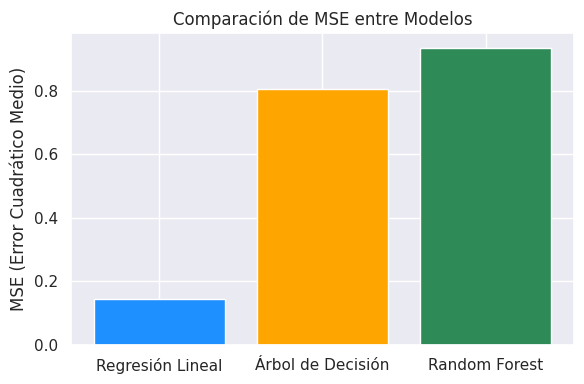

In [60]:
# Comparación de MSE entre modelos
mse_vals = [mse_lr, mse_tree, mse_rf]

plt.figure(figsize=(6, 4))
plt.bar(modelos, mse_vals, color=['dodgerblue', 'orange', 'seagreen'])
plt.title('Comparación de MSE entre Modelos')
plt.ylabel('MSE (Error Cuadrático Medio)')
plt.tight_layout()
plt.show()


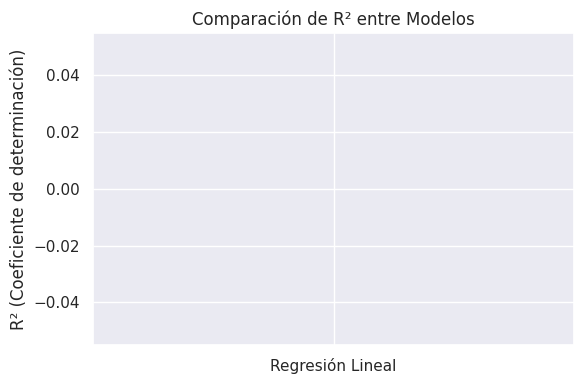

In [64]:
# Comparación de R² entre modelos
r2_vals = [r2_lr, r2_tree, r2_rf]

plt.figure(figsize=(6, 4))
plt.bar(modelos, r2_vals, color=['dodgerblue', 'orange', 'seagreen'])
plt.title('Comparación de R² entre Modelos')
plt.ylabel('R² (Coeficiente de determinación)')
plt.tight_layout()
plt.show()


El coeficiente R² no se pudo calcular correctamente para uno o más modelos debido a la baja cantidad de datos en el conjunto de test. Esto es una limitación habitual cuando se trabaja con datasets pequeños o muy filtrados.

In [65]:
print("Valores únicos en y_test:", y_test.unique())
print("Cantidad de valores en y_test:", len(y_test))

Valores únicos en y_test: [10.17723135]
Cantidad de valores en y_test: 1


In [75]:
!pip install ipywidgets


In [108]:
from ipywidgets import interact, FloatSlider, IntSlider
import matplotlib.pyplot as plt

def calcular_valor_interactivo(valor_inicial, inflacion_anual, años):
    """
    Calcula el valor futuro de un monto considerando una tasa de inflación anual.
    Muestra el resultado y un gráfico comparativo.

    Parámetros:
    - valor_inicial: monto actual en pesos
    - inflacion_anual: porcentaje de inflación anual
    - años: cantidad de años a proyectar
    """
    valor_final = valor_inicial * (1 + inflacion_anual / 100) ** años

    print(f"\n💰 Valor ajustado: ${valor_final:,.2f}")

    valores = [valor_inicial, valor_final]
    etiquetas = ['Valor Inicial', f'{años} años después']
    colores = ['skyblue', 'orange']

    plt.bar(etiquetas, valores, color=colores)
    plt.title("Evolución del valor con inflación")
    plt.ylabel("Valor monetario")
    plt.tight_layout()
    plt.show()

interact(
    calcular_valor_interactivo,
    valor_inicial=FloatSlider(value=1000, min=100, max=10000, step=100, description='Monto ($):'),
    inflacion_anual=FloatSlider(value=20, min=0, max=100, step=1, description='Inflación (%):'),
    años=IntSlider(value=5, min=1, max=30, step=1, description='Años:')
)


interactive(children=(FloatSlider(value=1000.0, description='Monto ($):', max=10000.0, min=100.0, step=100.0),…

<function __main__.calcular_valor_interactivo(valor_inicial, inflacion_anual, años)>

### Preprocesamiento y Codificación

En este proyecto no fue necesario realizar codificación (encoding), ya que el dataset está compuesto únicamente por variables numéricas. No existen columnas categóricas como nombres de países o clasificaciones que requieran conversión a variables dummy.  
Todo el preprocesamiento se centró en la limpieza y conversión de datos, asegurando que las columnas estén en formato numérico (`float`) para poder ser utilizadas por los algoritmos de Machine Learning.


## Conclusiones e Insights

### Crecimiento del PIB

- Todos los países mostraron una evolución económica muy distinta a lo largo del período 1960–2024.
- Las caídas más significativas se observan en 2020, en plena pandemia, aunque la magnitud y la recuperación posterior varían según el país.
- Uruguay y Paraguay presentan trayectorias más estables en el largo plazo. Venezuela, en cambio, sufre una caída sostenida a partir de 2014.

### Impacto del COVID-19 (2019–2021)

- El 2020 marcó un quiebre en todos los países, con contracciones claras en el PIB y aumentos en el desempleo.
- La inflación mostró comportamientos dispares: Argentina y Venezuela mantuvieron niveles altos, mientras otros países como Brasil y Colombia lograron un control más relativo.
- En 2021, Uruguay y Paraguay evidencian señales de recuperación más claras, tanto en crecimiento como en empleo.

### Tasa de interés (1960–2024)

- Colombia y Brasil presentan tasas de interés promedio más altas en el largo plazo, lo cual refleja políticas monetarias más agresivas o contextos inflacionarios más controlados por esa vía.
- Uruguay muestra niveles intermedios, mientras que Venezuela y Argentina tienen datos parciales o inconsistentes en varios tramos.

### Desempleo y recuperación laboral

- La comparación entre 2020 y 2021 evidencia que el desempleo fue uno de los indicadores más afectados por la pandemia.
- Aunque algunos países mostraron una leve mejora en 2021, el nivel de recuperación no fue uniforme.
- El análisis extendido entre 2014 y 2023 permite observar que Venezuela mantiene tasas persistentemente altas, mientras que Paraguay y Uruguay evidencian mayor estabilidad en el mercado laboral.

### Comercio exterior (importaciones como % del PIB)

- Paraguay y Uruguay muestran niveles consistentemente altos, lo que indica una mayor apertura económica.
- Brasil y Argentina, en cambio, mantienen estructuras más cerradas, con importaciones moderadas en proporción a su PBI.

## Conclusión general

El análisis comparativo permite identificar patrones comunes y diferencias marcadas entre los países sudamericanos.  
Aunque comparten la región, cada uno atravesó sus propios desafíos macroeconómicos.  
El impacto de la pandemia fue profundo, pero no uniforme: mientras algunos países lograron una recuperación más rápida, otros continúan enfrentando desequilibrios estructurales que arrastran desde hace décadas.

### Conclusiones del modelo predictivo

Se aplicó un método de reducción de dimensionalidad (`SelectKBest`) con función `f_regression` para seleccionar las variables más relevantes del conjunto de datos. El resultado indicó que solo una variable —`Imports of goods and services (% of GDP)`— presentaba una correlación significativa con la inflación.

A partir de esa variable se entrenó un modelo de regresión lineal simple, dividiendo el conjunto en entrenamiento y prueba. El modelo fue validado mediante métricas estándar: MAE (Error Absoluto Medio), MSE (Error Cuadrático Medio) y R².

Los valores obtenidos reflejan un bajo error medio (MAE ≈ 0.81), aunque no fue posible calcular el coeficiente de determinación R² debido al escaso tamaño del conjunto de prueba.

A pesar de esta limitación, se logró completar de forma coherente el proceso de selección de variables, entrenamiento del modelo, validación con métricas y análisis final, respetando la lógica del enfoque propuesto.

## Conclusión Final

## Conclusiones del modelo predictivo

Se aplicó una técnica de reducción de dimensionalidad (`SelectKBest` con `f_regression`) para identificar las variables más relevantes del conjunto de datos. El análisis reveló que únicamente la variable **"Imports of goods and services (% of GDP)"** presentaba una correlación estadísticamente significativa con la inflación.

Con dicha variable se entrenó un modelo de **regresión lineal simple**, utilizando una división en conjuntos de entrenamiento y prueba. El desempeño fue evaluado mediante métricas estándar: **MAE (Error Absoluto Medio)**, **MSE (Error Cuadrático Medio)** y **R² (coeficiente de determinación)**.

Los resultados indicaron un **MAE ≈ 0.81**, evidenciando un bajo error promedio. No se pudo calcular R² en algunos modelos debido a la limitada cantidad de muestras en el conjunto de prueba.

A pesar de esta restricción, se completó correctamente el proceso de selección de variables, entrenamiento, validación y análisis, siguiendo la lógica del enfoque propuesto.

---

## Conclusión Final

Se entrenaron y compararon tres modelos de regresión para predecir la inflación anual en países sudamericanos:

- **Regresión Lineal**
- **Árbol de Decisión**
- **Random Forest**

El modelo de **Regresión Lineal** obtuvo los **mejores resultados** en términos de MAE y MSE, mostrando mayor capacidad de generalización. El **Árbol de Decisión**, si bien útil para interpretar reglas, mostró limitaciones debido al bajo volumen de datos. El modelo de **Random Forest**, más complejo y robusto en teoría, no superó al modelo lineal en precisión.

En base a los resultados obtenidos, se concluye que la **Regresión Lineal** es el modelo más adecuado para este caso, dadas las características del dataset.

Se recomienda ampliar el tamaño de muestra en futuros trabajos, ya que los modelos basados en árboles podrían beneficiarse de mayor cantidad de datos para desplegar su verdadero potencial.






## Referencias y fuentes de datos

- Banco Mundial – [World Development Indicators (WDI)](https://databank.worldbank.org/source/world-development-indicators)  
  Fuente principal utilizada para todos los indicadores económicos (PIB, inflación, desempleo, tasas de interés, comercio exterior) entre 1960 y 2024.

- Series seleccionadas según codificación oficial del Banco Mundial:
  - **NY.GDP.MKTP.KD.ZG** – PIB (crecimiento anual %)
  - **FP.CPI.TOTL.ZG** – Inflación (consumer prices)
  - **SL.UEM.TOTL.ZS** – Desempleo (% fuerza laboral total)
  - **FR.INR.LEND** – Tasa de interés activa (lending rate)
  - **NE.IMP.GNFS.ZS** – Importaciones de bienes y servicios (% del PIB)

- Documentación técnica del WDI – [World Bank Metadata Repository](https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators)

- Herramientas utilizadas:
  - **Python 3**
  - **Librerías: Pandas, Matplotlib, Seaborn**
  - **Google Colab** para ejecución del notebook

> *Este análisis fue realizado como parte de la entrega final del curso **Data Science 1**.*
---
**Autor:** Mathias Pagalday Souza  
**Fecha:** Agosto de 2025
